In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import matplotlib
import re
import os
import operator
from collections import defaultdict
# Set 
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['font.size']=22

In [2]:
pathdir='./input_data/'

# Processing Score per Category

In [4]:
data20152016PS=pd.read_csv(pathdir+"FNDDS_2015-16_62Nutrients_ensemble_5folds.csv")
# number of total WWEIA categories
print('Number of WWEIA categories in 2015-2916: ', len(set(data20152016PS['WWEIA Category description'])))

Number of WWEIA categories in 2015-2916:  155


In [5]:
# median values
whichscore='FPro'
dfsel=data20152016PS[data20152016PS['WWEIA Category description']!='Not included in a food category']
foodcategory=list(set(dfsel['WWEIA Category description']))
mv=[dfsel[whichscore][dfsel['WWEIA Category description']==w].median() for w in foodcategory]
foodcategory_s=[foodcategory[i] for i in np.argsort(mv)]
s=[sum(dfsel['WWEIA Category description']==w) for w in foodcategory]
foodcategoryDB=pd.DataFrame.from_dict({'Category': foodcategory, 'Size': s, 'MedianFPS': mv}).sort_values(by=['Size'], ascending=False)

# get only those categories that are >=20 foods and are not Baby food or others
fs=foodcategoryDB[foodcategoryDB['Size']>=20]
fs=fs[~fs['Category'].isin(set(data20152016PS[data20152016PS['WWEIA Category description'].str.lower().str.contains('baby', case=False)]['WWEIA Category description']))]
fs=fs[~fs['Category'].isin(set(data20152016PS[data20152016PS['WWEIA Category description'].str.contains('Other')]['WWEIA Category description']))]
fs=fs[~fs['Category'].isin(set(data20152016PS[data20152016PS['WWEIA Category description'].str.lower().str.contains('formula', case=False)]['WWEIA Category description']))]
fs

,Category,Size,MedianFPS
150,Fish,340,0.538236
73,Meat mixed dishes,307,0.926589
125,"Dark green vegetables, excludes lettuce",288,0.763766
127,Soups,232,0.837095
37,Cakes and pies,202,0.993194
...,...,...,...
84,"Egg rolls, dumplings, sushi",25,0.722148
114,Processed soy products,25,0.907444
42,"Flavored milk, reduced fat",22,0.692997
36,Tomatoes,22,0.770787


In [6]:
# values for filtered boxplot
mv=[dfsel[whichscore][dfsel['WWEIA Category description']==w].median() for w in fs['Category']]
foodcategory_s=[fs['Category'].iloc[i] for i in np.argsort(mv)]
x=[w for w in foodcategory_s for ind in range(sum(dfsel['WWEIA Category description']==w))]
y=[val for w in foodcategory_s for val in dfsel[whichscore][dfsel['WWEIA Category description']==w]]

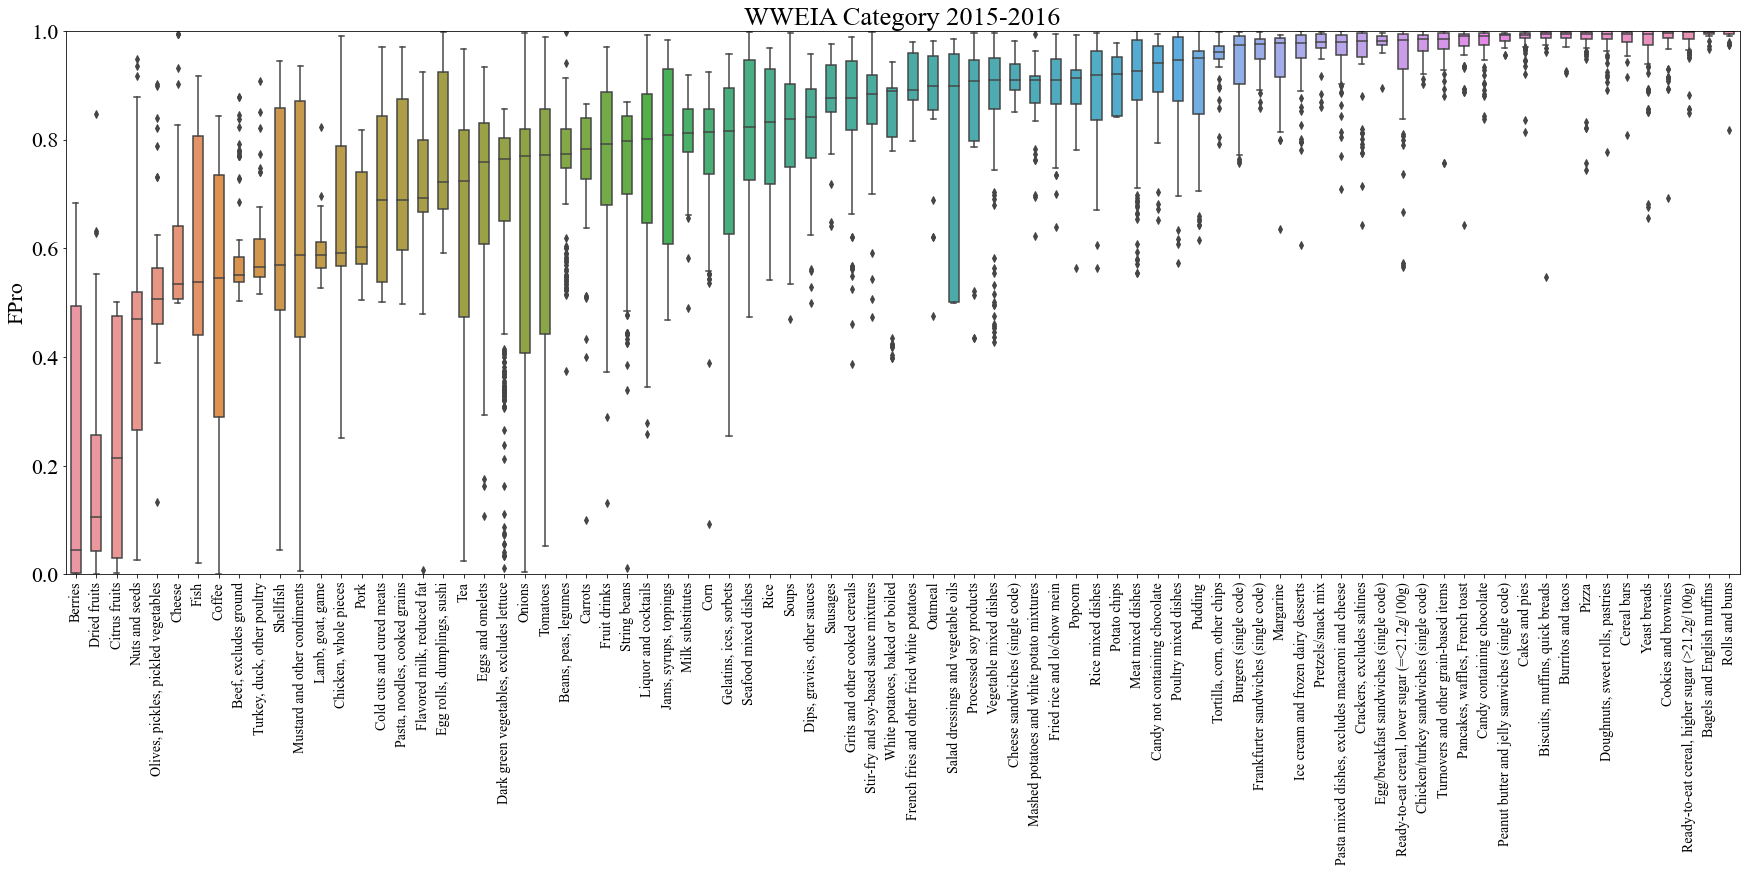

In [7]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(x=x, y=y,width=0.5);

ax.set_xlabel("")
ax.set_ylabel("FPro")
ax.set_ylim(0, 1);
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set_title('WWEIA Category 2015-2016');